# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

## Objectives:
- **Pertemuan 12**: Master data cleaning and preparation techniques using Pandas.
- **Pertemuan 13**: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.


In [ ]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


<ipython-input-1-7d141c975721>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-1-7d141c975721>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


In [ ]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Menampilkan info umum tentang dataset untuk melihat kolom dan nilai yang hilang
print(df.info())

# Menampilkan nilai yang hilang di setiap kolom
nilai_hilang = df.isnull().sum()
print("\nNilai yang hilang di setiap kolom:\n", nilai_hilang)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Nilai yang hilang di setiap kolom:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik
col_numerik = df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan normalisasi pada kolom numerik
df[col_numerik] = scaler.fit_transform(df[col_numerik])

print("\nDataset setelah normalisasi kolom numerik:\n", df.head())


Dataset setelah normalisasi kolom numerik:
    PassengerId  Survived  Pclass  \
0     0.000000       0.0     1.0   
1     0.001124       1.0     0.0   
2     0.002247       1.0     1.0   
3     0.003371       1.0     0.0   
4     0.004494       0.0     1.0   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174  0.125   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229  0.125   
2                             Heikkinen, Miss. Laina  female  0.321438  0.000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531  0.125   
4                           Allen, Mr. William Henry    male  0.434531  0.000   

   Parch            Ticket      Fare Cabin Embarked  
0    0.0         A/5 21171  0.014151   NaN        S  
1    0.0          PC 17599  0.139136   C85        C  
2    0.0  STON/O2. 3101282  0.015469   NaN        S  
3    0.0            113803  0.10364

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Misalkan df adalah DataFrame yang berisi data yang sudah ada

# Pilih kolom kategori
col_kategori = df.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan LabelEncoder pada kolom kategori
for col in col_kategori:
    df[col] = label_encoder.fit_transform(df[col].fillna('Unknown'))

print("\nDataset setelah standarisasi kolom kategori:\n", df.head())

# Menghapus duplikat
df = df.drop_duplicates()

print("\nDataset setelah menghapus duplikat:\n", df.head())

# Mengisi nilai yang hilang di kolom 'Age' dengan rata-rata usia
df['Age'] = df['Age'].fillna(df['Age'].mean())

print("\nDataset setelah mengisi nilai hilang di kolom 'Age' dengan rata-rata:\n", df.head())

# Menampilkan info umum tentang dataset untuk melihat kolom dan nilai yang hilang
print(df.info())

# Menampilkan nilai yang hilang di setiap kolom
nilai_hilang = df.isnull().sum()
print("\nNilai yang hilang di setiap kolom:\n", nilai_hilang)


Dataset setelah standarisasi kolom kategori:
    PassengerId  Survived  Pclass  Name  Sex       Age  SibSp  Parch  Ticket  \
0     0.000000       0.0     1.0   108    1  0.271174  0.125    0.0     523   
1     0.001124       1.0     0.0   190    0  0.472229  0.125    0.0     596   
2     0.002247       1.0     1.0   353    0  0.321438  0.000    0.0     669   
3     0.003371       1.0     0.0   272    0  0.434531  0.125    0.0      49   
4     0.004494       0.0     1.0    15    1  0.434531  0.000    0.0     472   

       Fare  Cabin  Embarked  
0  0.014151    147         2  
1  0.139136     81         0  
2  0.015469    147         2  
3  0.103644     55         2  
4  0.015713    147         2  

Dataset setelah menghapus duplikat:
    PassengerId  Survived  Pclass  Name  Sex       Age  SibSp  Parch  Ticket  \
0     0.000000       0.0     1.0   108    1  0.271174  0.125    0.0     523   
1     0.001124       1.0     0.0   190    0  0.472229  0.125    0.0     596   
2     0.002247   

In [ ]:
df.to_csv('Titanic-Dataset-Normal.csv', index=False)

## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.


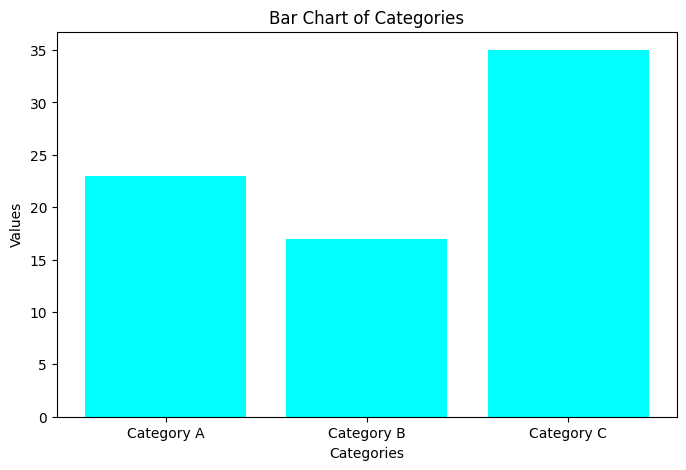

In [ ]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


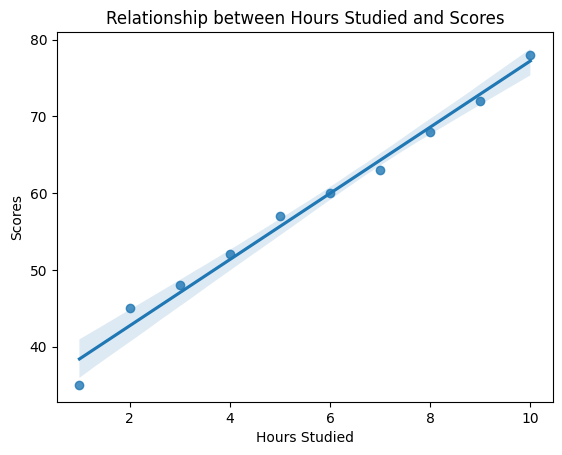

In [ ]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


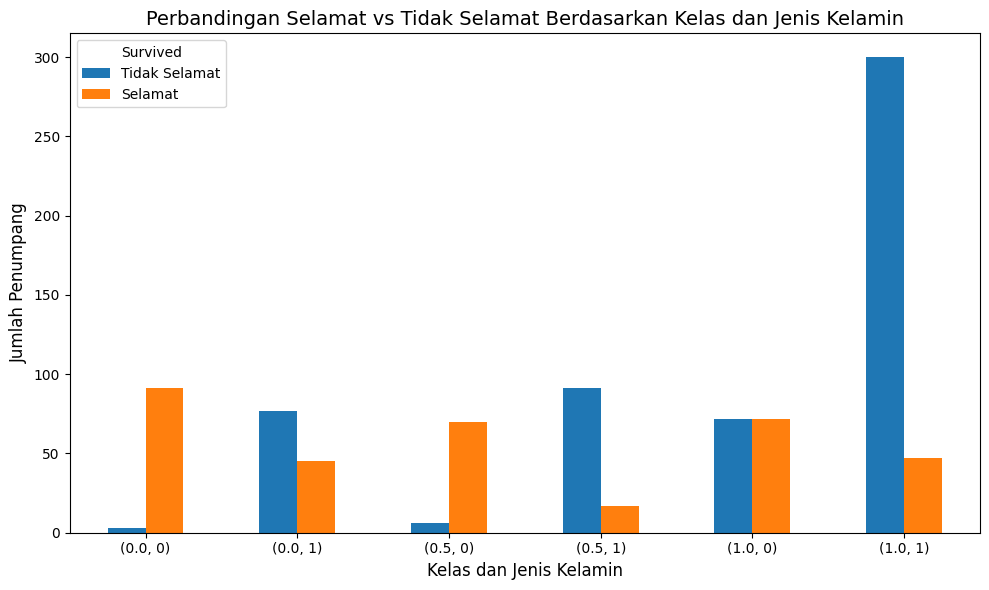

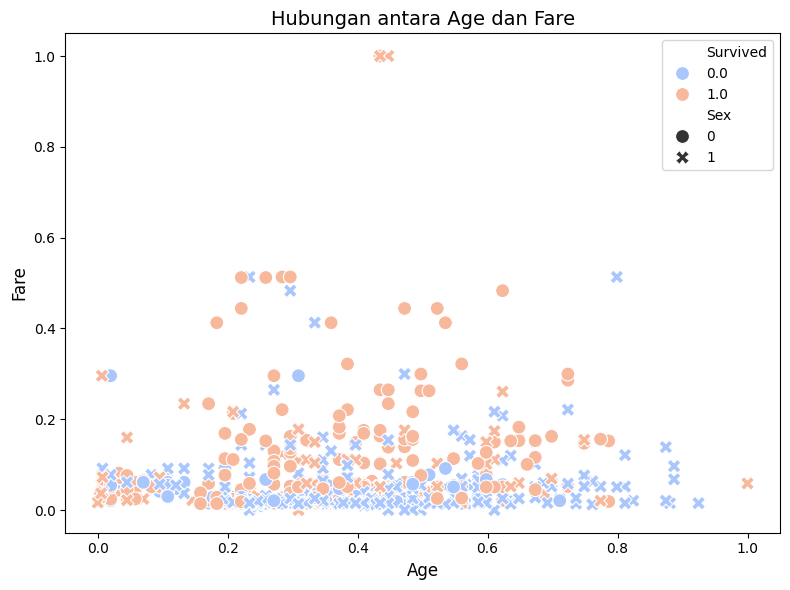

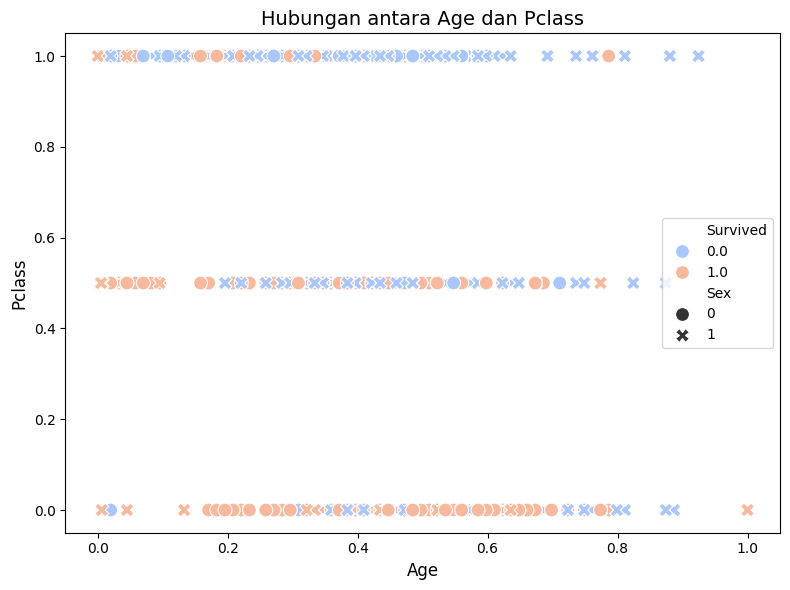

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan kolom untuk perbandingan
pclass_gender_survived = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)

# 1. Multi-Bar Chart menggunakan Matplotlib
# Membuat plot
pclass_gender_survived.plot(kind='bar', stacked=False, figsize=(10, 6))

# Menambahkan title dan label
plt.title('Perbandingan Selamat vs Tidak Selamat Berdasarkan Kelas dan Jenis Kelamin', fontsize=14)
plt.xlabel('Kelas dan Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])

# Menampilkan plot
plt.tight_layout()
plt.show()

# 2. Scatter Plot dengan Seaborn
# a) Scatter plot antara Age dan Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='coolwarm', style='Sex', s=100)

# Menambahkan title dan label
plt.title('Hubungan antara Age dan Fare', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

# b) Scatter plot antara Age dan Pclass
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Pclass', data=df, hue='Survived', palette='coolwarm', style='Sex', s=100)

# Menambahkan title dan label
plt.title('Hubungan antara Age dan Pclass', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Pclass', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.
- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy import stats

# Memuat dataset Titanic
df = pd.read_csv('Titanic-Dataset.csv')

# 1. Pembersihan Data: Mengatasi Missing Values
# Menampilkan info umum tentang dataset
print(df.info())

# Menangani nilai yang hilang (misalnya dengan mengganti dengan median atau modus)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Memeriksa apakah ada duplikat
df.drop_duplicates(inplace=True)

# Menampilkan nilai yang hilang setelah pembersihan
missing_values = df.isnull().sum()
print("\nNilai yang hilang setelah pembersihan:\n", missing_values)

# 2. Normalisasi Data
# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan normalisasi pada kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Menampilkan beberapa baris pertama setelah normalisasi
print("\nDataset setelah normalisasi:\n", df.head())

# 3. Menangani Outliers
# Menggunakan metode Z-score untuk mendeteksi outliers
z_scores = np.abs(stats.zscore(df[numerical_cols]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Menghapus baris dengan Z-score lebih dari 3

# Menampilkan data setelah menghapus outliers
print("\nDataset setelah menghapus outliers:\n", df_no_outliers.head())

# 4. Persiapan Data untuk Analisis
# Encoding kolom kategori menggunakan LabelEncoder untuk variabel kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col].fillna('Unknown'))

# Menampilkan dataset final yang sudah siap untuk analisis
print("\nDataset siap untuk analisis:\n", df_no_outliers.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Nilai yang hilang setelah pembersihan:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked   

<ipython-input-18-752d2393513a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)
<ipython-input-18-752d2393513a>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

<ipython-input-16-f90eb1e05e01>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers, x='Pclass', y='Age', ax=axes[1, 0], palette="pastel")


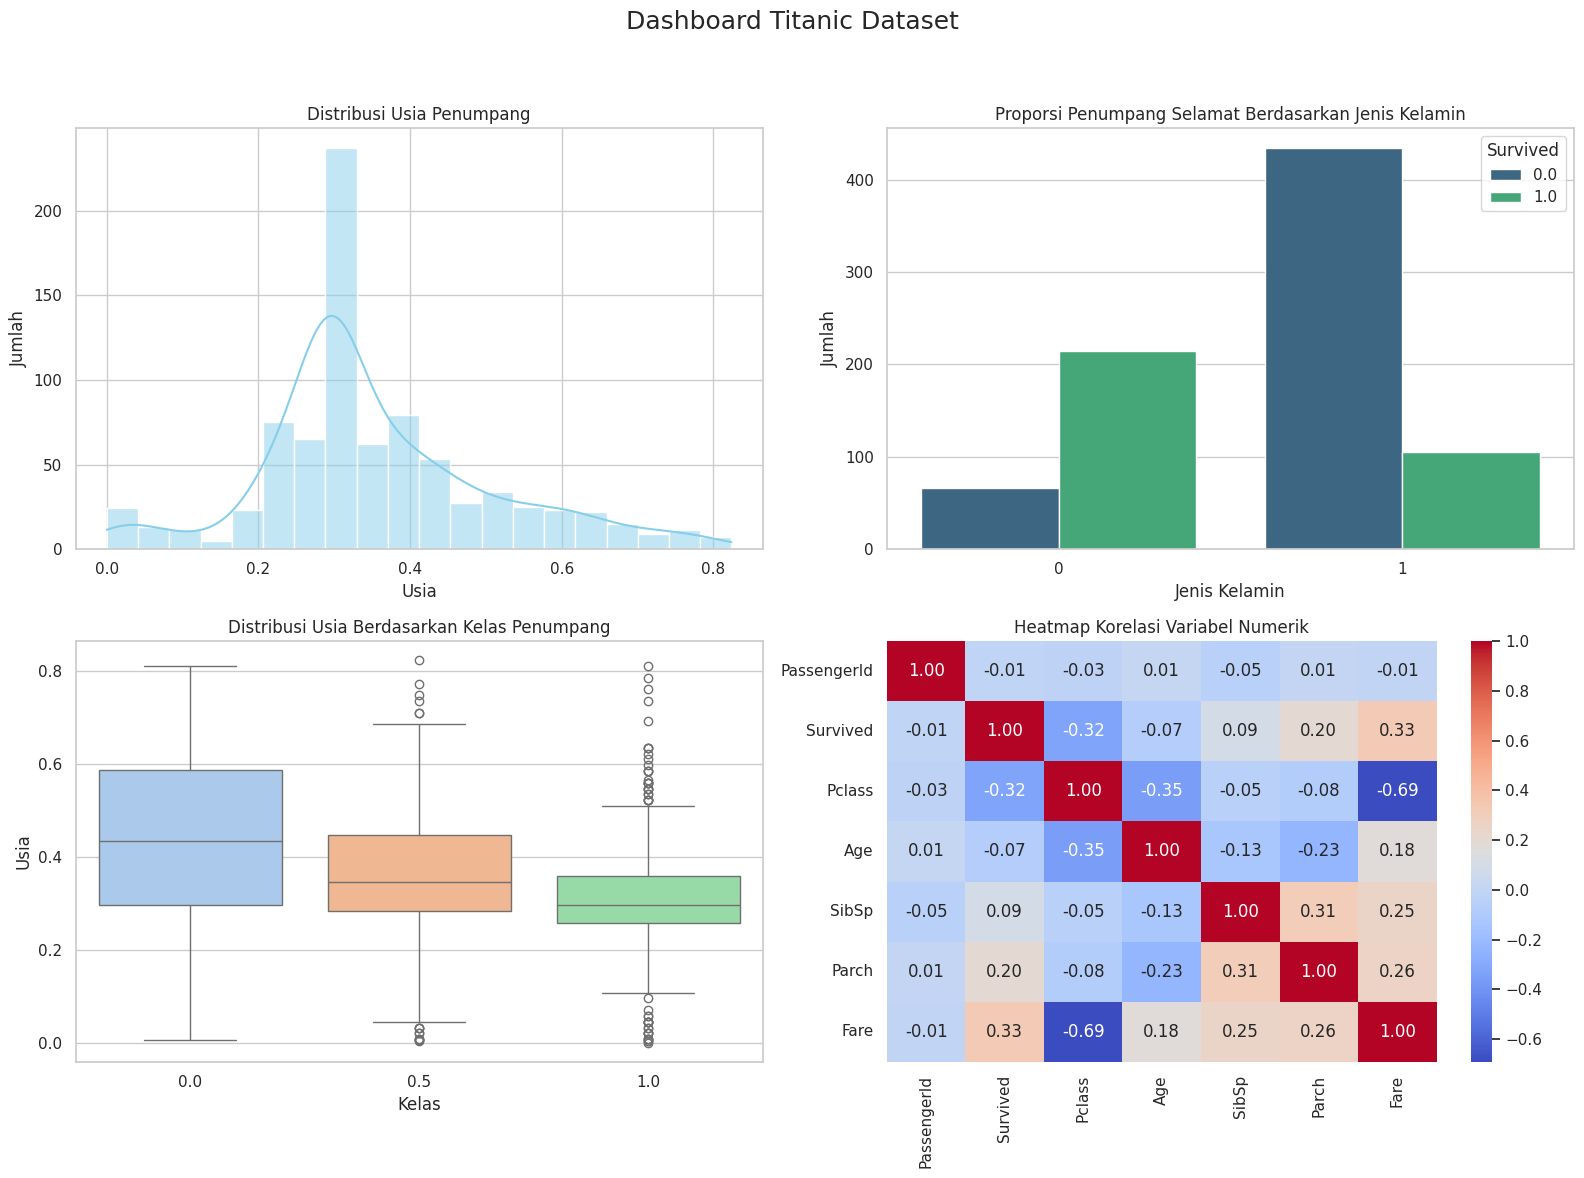

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Mengatur tema seaborn
sns.set_theme(style="whitegrid")

# 2. Membuat subplots untuk dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Dashboard Titanic Dataset", fontsize=18)

# 3. Visualisasi 1: Distribusi usia penumpang
sns.histplot(df_no_outliers['Age'], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribusi Usia Penumpang")
axes[0, 0].set_xlabel("Usia")
axes[0, 0].set_ylabel("Jumlah")

# 4. Visualisasi 2: Proporsi penumpang yang selamat berdasarkan jenis kelamin
sns.countplot(data=df_no_outliers, x='Sex', hue='Survived', ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Proporsi Penumpang Selamat Berdasarkan Jenis Kelamin")
axes[0, 1].set_xlabel("Jenis Kelamin")
axes[0, 1].set_ylabel("Jumlah")
axes[0, 1].legend(title="Survived", loc="upper right")

# 5. Visualisasi 3: Boxplot distribusi usia berdasarkan kelas penumpang
sns.boxplot(data=df_no_outliers, x='Pclass', y='Age', ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("Distribusi Usia Berdasarkan Kelas Penumpang")
axes[1, 0].set_xlabel("Kelas")
axes[1, 0].set_ylabel("Usia")

# 6. Visualisasi 4: Heatmap korelasi antar variabel numerik
correlation_matrix = df_no_outliers[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Heatmap Korelasi Variabel Numerik")

# 7. Menyesuaikan tata letak
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 8. Menampilkan dashboard
plt.show()
